# 1: Data Simulation

In [2]:
import numpy as np
import pandas as pd
import os, pdb, sys, pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# BASE DATASET
path = 'C://Users//cshul//Downloads//adult//adult.data'
df = pd.read_csv(path, header = None)
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
        'hours-per-week', 'native-country', 'income']
df.columns = cols
keeps = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
         'hours-per-week', 'native-country', 'income']
df = df[keeps]
df['geq_50k'] = [1 if i == ' <=50K' else 0 for i in df['income']]
df = df.drop(['income'], axis = 1)
tr, te = train_test_split(df, test_size = 0.3, random_state = 42)
tr.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,geq_50k
19749,34,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,1
1216,48,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,0
27962,23,State-gov,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,1
23077,56,Local-gov,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,1
10180,17,Private,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,1


In [3]:
ted = te.copy(deep = True)
ted['age'] = [1.1 * i for i in ted['age']]
ted['education-num'] = [1.5*i for i in ted['education-num']]
ted['capital-gain'] = [1.5*i for i in ted['capital-gain']]
ted['capital-loss'] = [1.5*i for i in ted['capital-loss']]
ted['hours-per-week'] = [1.5*i for i in ted['hours-per-week']]
ted.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,geq_50k
14160,29.7,Private,15.0,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,57.0,United-States,1
27048,49.5,State-gov,13.5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,60.0,United-States,1
28868,31.9,Private,19.5,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,82.5,United-States,0
5667,33.0,Private,19.5,Never-married,Machine-op-inspct,Not-in-family,White,Female,0.0,0.0,60.0,United-States,1
7827,31.9,Self-emp-not-inc,15.0,Divorced,Craft-repair,Not-in-family,White,Male,3303.0,0.0,75.0,United-States,1


Model Evaluation:

Evaluate the baseline model on the modified datasets.
Measure performance metrics (e.g., accuracy, precision, recall) to observe how the model's performance degrades due to the introduced drift.
Adaptation Strategies:

Implement strategies to adapt the model to the drifted data, such as retraining the model, using online learning methods, or applying domain adaptation techniques.
Compare the performance of the adapted model to the baseline model on the drifted datasets.

# Train GBC

In [4]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
model = CatBoostClassifier(iterations=200, depth=4, learning_rate=0.05, loss_function = 'Logloss')
keeps = [i for i in tr.columns if i != 'geq_50k']
model.fit(tr[keeps], tr['geq_50k'], cat_features=cat_features)
tr['pred'] = model.predict(tr[keeps])
te['pred'] = model.predict(te[keeps])
ted['pred'] = model.predict(ted[keeps])
tr.head()

0:	learn: 0.6477436	total: 231ms	remaining: 45.9s
1:	learn: 0.6077563	total: 281ms	remaining: 27.8s
2:	learn: 0.5734370	total: 328ms	remaining: 21.6s
3:	learn: 0.5420244	total: 374ms	remaining: 18.3s
4:	learn: 0.5156586	total: 425ms	remaining: 16.6s
5:	learn: 0.4941385	total: 475ms	remaining: 15.4s
6:	learn: 0.4753703	total: 518ms	remaining: 14.3s
7:	learn: 0.4590549	total: 564ms	remaining: 13.5s
8:	learn: 0.4429819	total: 604ms	remaining: 12.8s
9:	learn: 0.4314216	total: 643ms	remaining: 12.2s
10:	learn: 0.4193477	total: 684ms	remaining: 11.8s
11:	learn: 0.4125677	total: 727ms	remaining: 11.4s
12:	learn: 0.4035813	total: 768ms	remaining: 11s
13:	learn: 0.3951483	total: 808ms	remaining: 10.7s
14:	learn: 0.3881809	total: 849ms	remaining: 10.5s
15:	learn: 0.3825140	total: 893ms	remaining: 10.3s
16:	learn: 0.3779713	total: 935ms	remaining: 10.1s
17:	learn: 0.3734810	total: 977ms	remaining: 9.88s
18:	learn: 0.3695130	total: 1.02s	remaining: 9.71s
19:	learn: 0.3651025	total: 1.06s	remaining

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,geq_50k,pred
19749,34,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,1,1
1216,48,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,0,0
27962,23,State-gov,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,1,1
23077,56,Local-gov,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,1,1
10180,17,Private,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,1,1


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
vals = ['train', 'test', 'te-drift']
vals = vals[::-1]
for f in [tr, te, ted]: 
    y, yp = f['geq_50k'], f['pred']
    print(vals[-1])
    vals.pop()
    print('accuracy: ' + str(accuracy_score(y,yp)))
    print('precision: ' + str(precision_score(y,yp)))
    print('recall: ' + str(recall_score(y,yp)))
    print('f1: ' + str(f1_score(y,yp)))
    print(confusion_matrix(y,yp))
    print('-------------------------------')

train
accuracy: 0.8699543699543699
precision: 0.8899918189255522
recall: 0.9451491456704315
f1: 0.916741573033708
[[ 3510  2017]
 [  947 16318]]
-------------------------------
test
accuracy: 0.8695874705701709
precision: 0.8920461753139668
recall: 0.9432595573440644
f1: 0.9169383231190508
[[1463  851]
 [ 423 7032]]
-------------------------------
te-drift
accuracy: 0.7866721261132152
precision: 0.9529431607353686
recall: 0.7578806170355467
f1: 0.8442916915720263
[[2035  279]
 [1805 5650]]
-------------------------------


# Compute PE

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gudhi import RipsComplex, SimplexTree

# Combine df and df_drifted
df_combined = pd.concat([tr, ted]).reset_index(drop=True)

# Generate a time index
df_combined['time'] = np.arange(len(df_combined))

# Create a function to compute persistence diagrams
def compute_persistence_diagrams(data):
    rips_complex = RipsComplex(points=data)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.persistence()
    persistence_intervals = simplex_tree.persistence_intervals_in_dimension(1)
    return persistence_intervals

# Create a function to compute persistence entropy
def compute_persistence_entropy(diagrams):
    entropies = []
    for diagram in diagrams:
        lifetimes = diagram[:, 1] - diagram[:, 0]
        lifetimes = lifetimes[lifetimes > 0]
        if len(lifetimes) > 0:
            p = lifetimes / lifetimes.sum()
            entropy = -np.sum(p * np.log(p))
        else:
            entropy = 0
        entropies.append(entropy)
    return entropies

# Compute persistence entropy over time
window_size = 30
entropy_values = []

for start in range(len(df_combined) - window_size + 1):
    window_data = df_combined[['age', 'education-num', 'capital-gain', 'capital-loss']].iloc[start:start + window_size].values
    persistence_diagrams = [compute_persistence_diagrams(window_data)]
    entropy_value = compute_persistence_entropy(persistence_diagrams)[0]
    entropy_values.append(entropy_value)
df_combined['pe'] = [0]*29 + entropy_values
dfc = df_combined.copy(deep = True)
dfc.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,geq_50k,pred,time,pe
0,34.0,Self-emp-not-inc,9.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0.0,2179.0,12.0,United-States,1,1,0,0.0
1,48.0,Self-emp-not-inc,10.0,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688.0,0.0,40.0,United-States,0,0,1,0.0
2,23.0,State-gov,10.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,30.0,United-States,1,1,2,0.0
3,56.0,Local-gov,9.0,Divorced,Exec-managerial,Not-in-family,White,Female,0.0,0.0,40.0,United-States,1,1,3,0.0
4,17.0,Private,7.0,Never-married,Priv-house-serv,Own-child,White,Female,0.0,0.0,9.0,United-States,1,1,4,0.0


In [7]:
avgs = [] 
idx = [] 
start, stop = 0, 100
while stop < len(dfc): 
    vals = list(dfc['pe'])[start:stop]
    avgs.append(np.mean(vals))
    idx.append(':' + str(stop))
    start = stop
    stop += 100
print(idx)

[':100', ':200', ':300', ':400', ':500', ':600', ':700', ':800', ':900', ':1000', ':1100', ':1200', ':1300', ':1400', ':1500', ':1600', ':1700', ':1800', ':1900', ':2000', ':2100', ':2200', ':2300', ':2400', ':2500', ':2600', ':2700', ':2800', ':2900', ':3000', ':3100', ':3200', ':3300', ':3400', ':3500', ':3600', ':3700', ':3800', ':3900', ':4000', ':4100', ':4200', ':4300', ':4400', ':4500', ':4600', ':4700', ':4800', ':4900', ':5000', ':5100', ':5200', ':5300', ':5400', ':5500', ':5600', ':5700', ':5800', ':5900', ':6000', ':6100', ':6200', ':6300', ':6400', ':6500', ':6600', ':6700', ':6800', ':6900', ':7000', ':7100', ':7200', ':7300', ':7400', ':7500', ':7600', ':7700', ':7800', ':7900', ':8000', ':8100', ':8200', ':8300', ':8400', ':8500', ':8600', ':8700', ':8800', ':8900', ':9000', ':9100', ':9200', ':9300', ':9400', ':9500', ':9600', ':9700', ':9800', ':9900', ':10000', ':10100', ':10200', ':10300', ':10400', ':10500', ':10600', ':10700', ':10800', ':10900', ':11000', ':11100

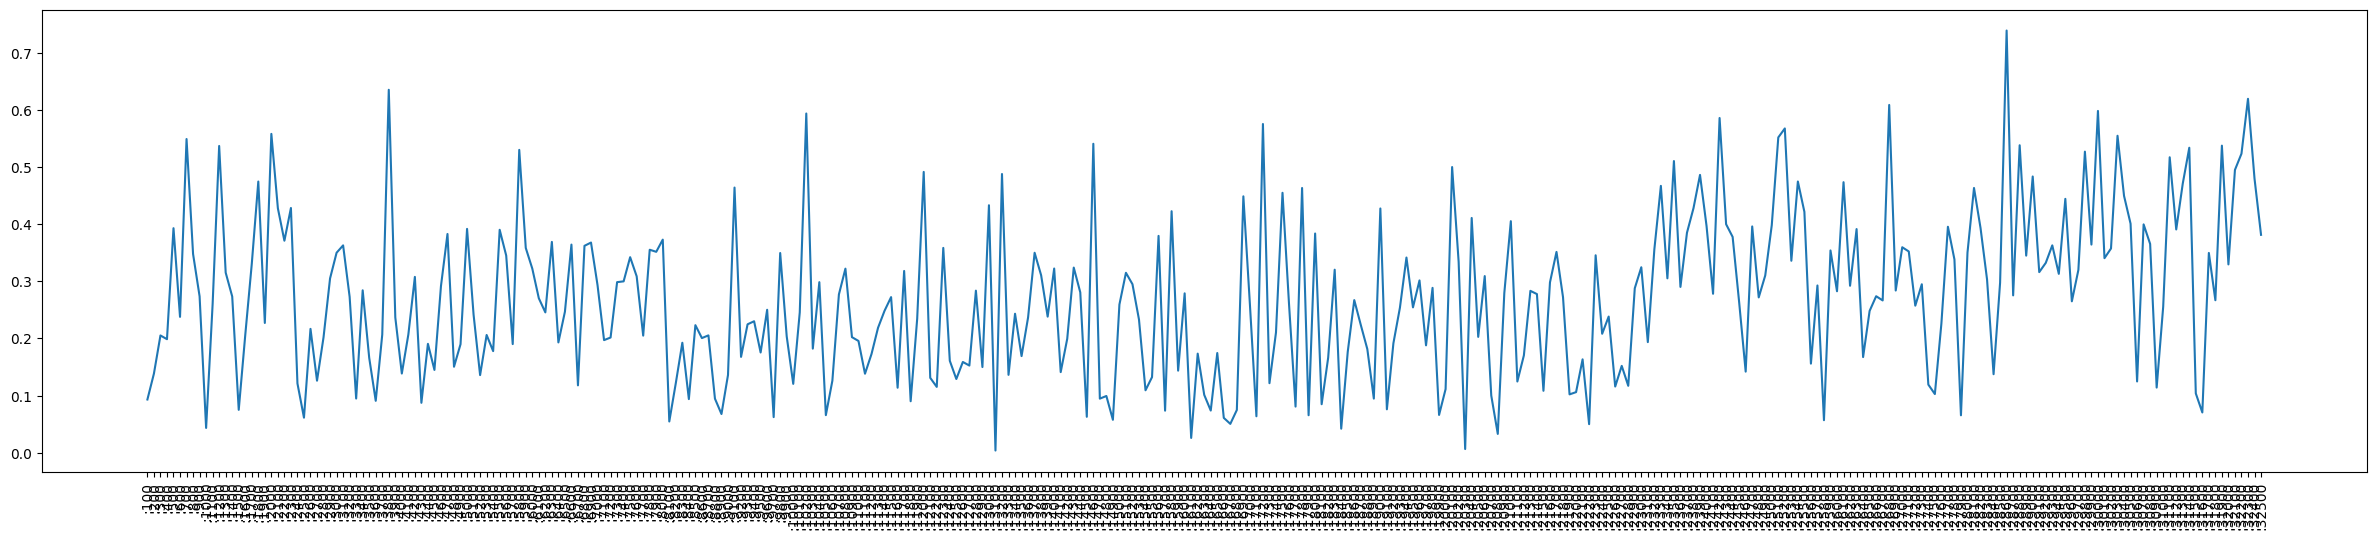

In [8]:
plt.figure(figsize=(30,6))
plt.plot(range(len(avgs)), avgs, label = 'average_pe')
plt.xticks(range(len(avgs)), idx, rotation = 90)
plt.show()

In [296]:
# Next: add psi calculation. redo simulation multiple times, showing that the change in pe scales with the amount of drift introduced. It goes up if we increase the size of the change. 
# It goes down if we decrease the size of the change. Also consider checking for the stationarity of the PE series. If it's stationary, no drift. If not, drift. 

In [1]:
numCols = ['age', 'education-num', 'marital-status']

NameError: name 'te' is not defined

In [10]:
keeps

['age',
 'workclass',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']